1632036002 JongSeop Park, Koreatech

kugipark@gmail.com

# Assignment. 자동차 평가 데이터에 대한 EDA 및 Decision Tree를 활용한 예측

* 데이터 집합 소스
 * 설명: http://archive.ics.uci.edu/ml/datasets/Car+Evaluation
   * Features
     * buying (자동차 가격): vhigh, high, med, low.
     * maint (유지보수 가격): vhigh, high, med, low.
     * doors (자동차 문의 개수): 2, 3, 4, 5more.
     * persons (자동차 안에 탈 수 있는 사람 인원): 2, 4, more.
     * log_boot (짐트렁크 크기): small, med, big.
     * safety (안전도): low, med, high.
    
   * Target
     * eval (평가만족도): unacc, acc, good, vgood
 * 모든 Attributes들을 Categorical 데이터로 취급해도 됨
 * 데이터: http://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data

### 패키지 import

In [1]:
import urllib2
from scipy import stats
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


### 데이터 불러오기

In [2]:
car_data_file = './car_data.csv'

try:
    df = pd.read_csv(car_data_file)
    print '저장된 데이터 로드됨: ' + car_data_file
except IOError:
    path = 'http://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
    raw_csv = urllib2.urlopen(path)
    feature_names = ('buying', 'maint', 'doors', 'persons', "log_boot", "safety")
    target_name = 'eval'
    all_names = feature_names + (target_name,)
    df = pd.read_csv(raw_csv, names=all_names)
    df.to_csv(car_data_file, index=True)
    print '온라인으로 데이터 다운로드됨: ' + car_data_file


저장된 데이터 로드됨: ./car_data.csv


In [3]:
df.describe()

,buying,maint,doors,persons,log_boot,safety,eval
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,med,med,3,more,med,med,unacc
freq,432,432,432,576,576,576,1210


In [4]:
df

,buying,maint,doors,persons,log_boot,safety,eval
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


## [Mission 1] 모든 속성들을 수치형 데이터로 변환
 * Mushroom 데이터 집합에 대한 "Categorical Attribute를 Numerical Attribute로 변환" 강의 내용 참조
 * 최종적으로 DataFrame.describe() 함수를 통하여 각 속성별로 기본 통계치를 산출

 * Mapping
   * Features
     * buying (자동차 가격): vhigh(4), high(3), med(2), low(1).
     * maint (유지보수 가격): vhigh(4), high(3), med(3), low(1).
     * doors (자동차 문의 개수): 2, 3, 4, 5more(5).
     * persons (자동차 안에 탈 수 있는 사람 인원): 2, 4, more(6).
     * log_boot (짐트렁크 크기): small(1), med(2), big(3).
     * safety (안전도): low(1), med(2), high(3).
    
   * Target
     * eval (평가만족도): unacc(1), acc(2), good(3), vgood(4)

### 데이터 mapping

In [5]:
mapData = {'vhigh': 4, 'high': 3, 'med': 2, 'low': 1,
         '5more': 5,
         'more': 6,
         'small': 1, 'big': 3,
         'unacc': 1, 'acc': 2, 'good': 3, 'vgood': 4,
         1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6,
         '2': 2, '3': 3, '4': 4}

In [6]:
df['buying'] = df['buying'].map(mapData)
df['maint'] = df['maint'].map(mapData)
df['doors'] = df['doors'].map(mapData)
df['persons'] = df['persons'].map(mapData)
df['log_boot'] = df['log_boot'].map(mapData)
df['safety'] = df['safety'].map(mapData)
df['eval'] = df['eval'].map(mapData)

In [7]:
df.describe()

,buying,maint,doors,persons,log_boot,safety,eval
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,2.500000,2.500000,3.500000,4.000000,2.000000,2.000000,1.414931
std,1.118358,1.118358,1.118358,1.633466,0.816733,0.816733,0.740700
min,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000
25%,1.750000,1.750000,2.750000,2.000000,1.000000,1.000000,1.000000
50%,2.500000,2.500000,3.500000,4.000000,2.000000,2.000000,1.000000
75%,3.250000,3.250000,4.250000,6.000000,3.000000,3.000000,2.000000
max,4.000000,4.000000,5.000000,6.000000,3.000000,3.000000,4.000000


## [Mission 2] Target 4개별로 그룹핑하여 각 속성별 기본 통계치 및 Box Plot 산출
 * Mushromm 데이터 집합에 대한 "Edible Mushrooms과 Poisonous Mushrooms 의 두 개의 그룹핑 작업 및 각 그룹별 Boxplot 그리기" 강의 내용 참조

In [8]:
df_unacc = df[df['eval'] == 1]
df_acc = df[df['eval'] == 2]
df_good = df[df['eval'] == 3]
df_vgood = df[df['eval'] == 4]

#### unacc

In [9]:
df_unacc.describe()

,buying,maint,doors,persons,log_boot,safety,eval
count,1210.000000,1210.000000,1210.000000,1210.000000,1210.000000,1210.000000,1210.0
mean,2.649587,2.633058,3.454545,3.580165,1.932231,1.752893,1.0
std,1.118099,1.127547,1.127152,1.671719,0.819754,0.802763,0.0
min,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.0
25%,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.0
50%,3.000000,3.000000,3.000000,4.000000,2.000000,2.000000,1.0
75%,4.000000,4.000000,4.000000,6.000000,3.000000,2.000000,1.0
max,4.000000,4.000000,5.000000,6.000000,3.000000,3.000000,1.0


C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  app.launch_new_instance()


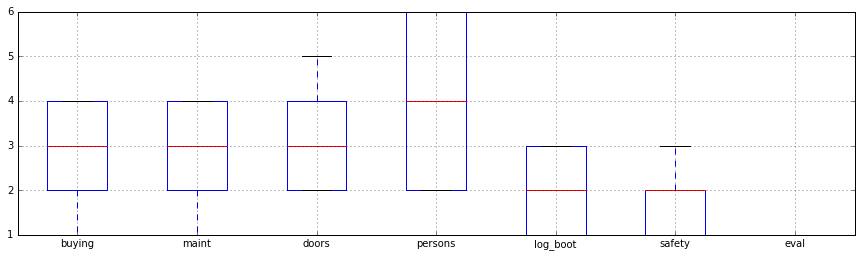

In [10]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
df_unacc.boxplot(ax=ax)
plt.show()

#### acc

In [11]:
df_acc.describe()

,buying,maint,doors,persons,log_boot,safety,eval
count,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.0
mean,2.424479,2.408854,3.585938,4.968750,2.101562,2.531250,2.0
std,1.041953,1.048199,1.094925,1.000816,0.799868,0.499674,0.0
min,1.000000,1.000000,2.000000,4.000000,1.000000,2.000000,2.0
25%,2.000000,2.000000,3.000000,4.000000,1.000000,2.000000,2.0
50%,2.000000,2.000000,4.000000,4.000000,2.000000,3.000000,2.0
75%,3.000000,3.000000,5.000000,6.000000,3.000000,3.000000,2.0
max,4.000000,4.000000,5.000000,6.000000,3.000000,3.000000,2.0


C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  app.launch_new_instance()


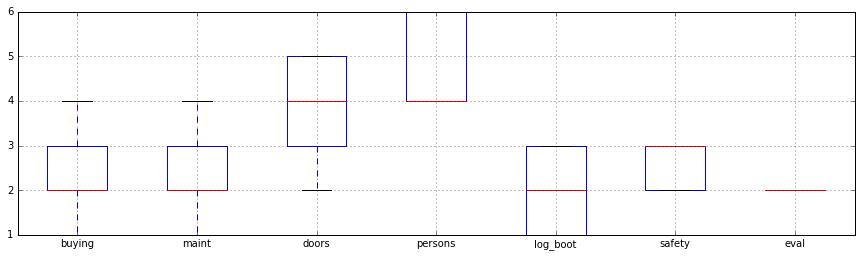

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
df_acc.boxplot(ax=ax)
plt.show()

#### good

In [13]:
df_good.describe()

,buying,maint,doors,persons,log_boot,safety,eval
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.0
mean,1.333333,1.333333,3.565217,4.956522,2.043478,2.434783,3.0
std,0.474858,0.474858,1.104513,1.006374,0.812309,0.499360,0.0
min,1.000000,1.000000,2.000000,4.000000,1.000000,2.000000,3.0
25%,1.000000,1.000000,3.000000,4.000000,1.000000,2.000000,3.0
50%,1.000000,1.000000,4.000000,4.000000,2.000000,2.000000,3.0
75%,2.000000,2.000000,5.000000,6.000000,3.000000,3.000000,3.0
max,2.000000,2.000000,5.000000,6.000000,3.000000,3.000000,3.0


C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  app.launch_new_instance()


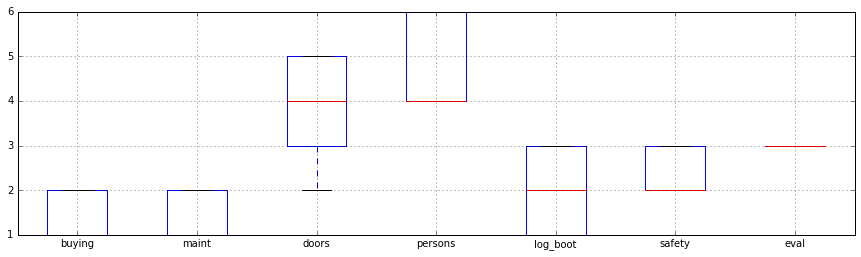

In [14]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
df_good.boxplot(ax=ax)
plt.show()

#### vgood

In [15]:
df_vgood.describe()

,buying,maint,doors,persons,log_boot,safety,eval
count,65.00000,65.000000,65.000000,65.000000,65.000000,65.0,65.0
mean,1.40000,1.800000,3.769231,5.076923,2.615385,3.0,4.0
std,0.49371,0.754155,1.057255,1.004796,0.490290,0.0,0.0
min,1.00000,1.000000,2.000000,4.000000,2.000000,3.0,4.0
25%,1.00000,1.000000,3.000000,4.000000,2.000000,3.0,4.0
50%,1.00000,2.000000,4.000000,6.000000,3.000000,3.0,4.0
75%,2.00000,2.000000,5.000000,6.000000,3.000000,3.0,4.0
max,2.00000,3.000000,5.000000,6.000000,3.000000,3.0,4.0


C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  app.launch_new_instance()


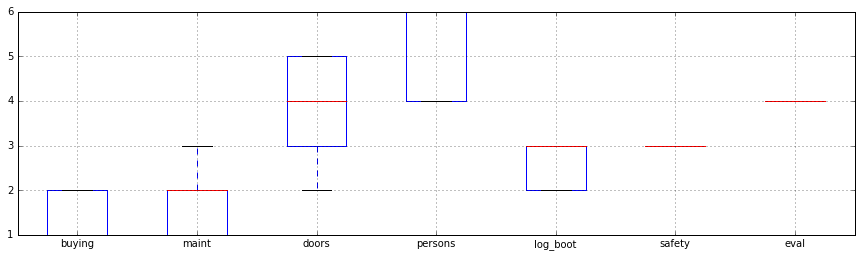

In [16]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
df_vgood.boxplot(ax=ax)
plt.show()

## [Mission 3] 각 속성들을 두 개씩 쌍을 지어서 각 쌍마다 Scatter Plot 그리기
 * Iris 데이터 집합에 대한 "탐색적 자료 분석 (Exploratory data analysis)" 강의 내용 참조
 * 총 6개의 Feature가 존재하므로 두 개씩 쌍을 만든다면 총 15개의 쌍이 나옴
   * 예. (buying, maint), (buying, doors), ...
 * Categorical Data를 Numerical Attribute로 변환한 DataFrame으로 작업해야 함
 * 그러므로, 총 15개의 Scatter Plot을 산출해야 함
 * 15개의 Scatter Plot을 눈으로 분석하여 Guess 할 수 있는 분석 내용을 작성

In [17]:
eval_names = ('unacc', 'acc', 'good', 'vgood')

In [18]:
feature_names = df.columns[0:6]
feature_names

Index([u'buying', u'maint', u'doors', u'persons', u'log_boot', u'safety'], dtype='object')

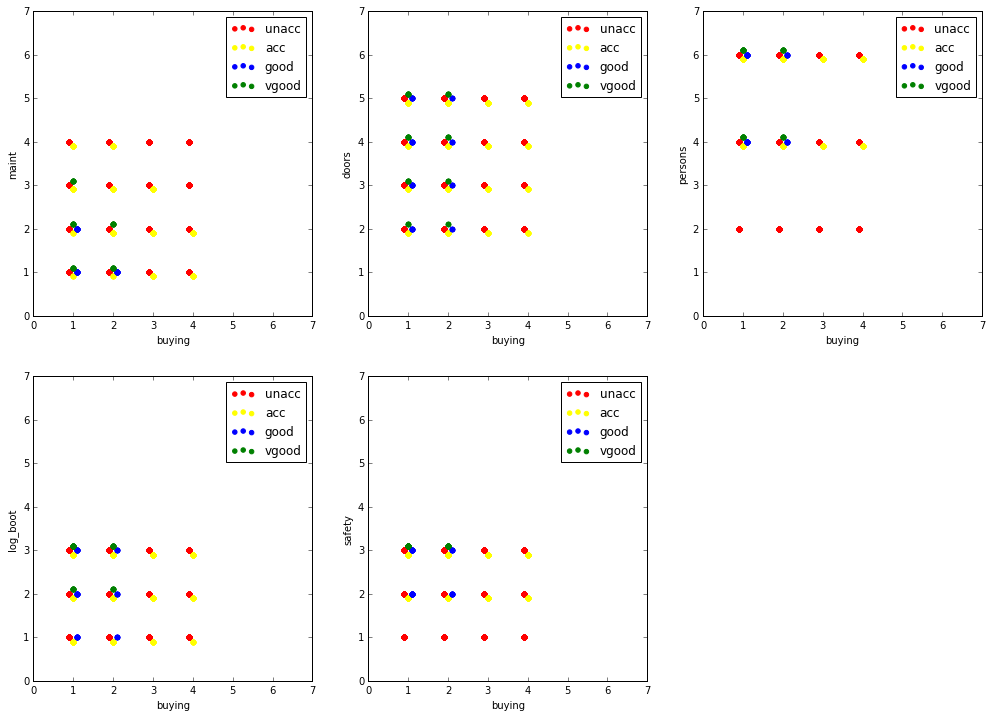

In [19]:
ax = []
fig = plt.figure(figsize=(17, 12))

xDataIdx = 0
yDataIdx = 1

for i in range(0,5):
    ax.append(fig.add_subplot(230 + (i+1)))

for i in range(0,5):
    x_data = feature_names[xDataIdx]
    y_data = feature_names[yDataIdx]
    ev1 = ax[i].scatter(df_unacc[x_data] - 0.1, df_unacc[y_data], color='red')
    ev2 = ax[i].scatter(df_acc[x_data], df_acc[y_data] - 0.1, color='yellow')
    ev3 = ax[i].scatter(df_good[x_data] + 0.1, df_good[y_data], color='blue')
    ev4 = ax[i].scatter(df_vgood[x_data], df_vgood[y_data] + 0.1, color='green')
    ax[i].set_xlabel(x_data)
    ax[i].set_ylabel(y_data)
    ax[i].set_xlim(0, 7)
    ax[i].set_ylim(0, 7)
    ax[i].legend((ev1, ev2, ev3, ev4), eval_names)
    yDataIdx = yDataIdx + 1

* 자동차 가격 대비 유지비용이 적을수록 만족도가 높다.
* 차량의 문 개수와 상관 없이 구매 가격이 낮을수록 만족도가 높다.
* 구매 가격이 낮은 차량이라도 최대 탑승 인원이 2인이면 만족도가 낮다.
* 구매 가격이 낮은 차량이라도 트렁크의 크기가 작으면 만족도가 낮다.
* 안전성이 높아야만 만족도가 높게 나타난다.

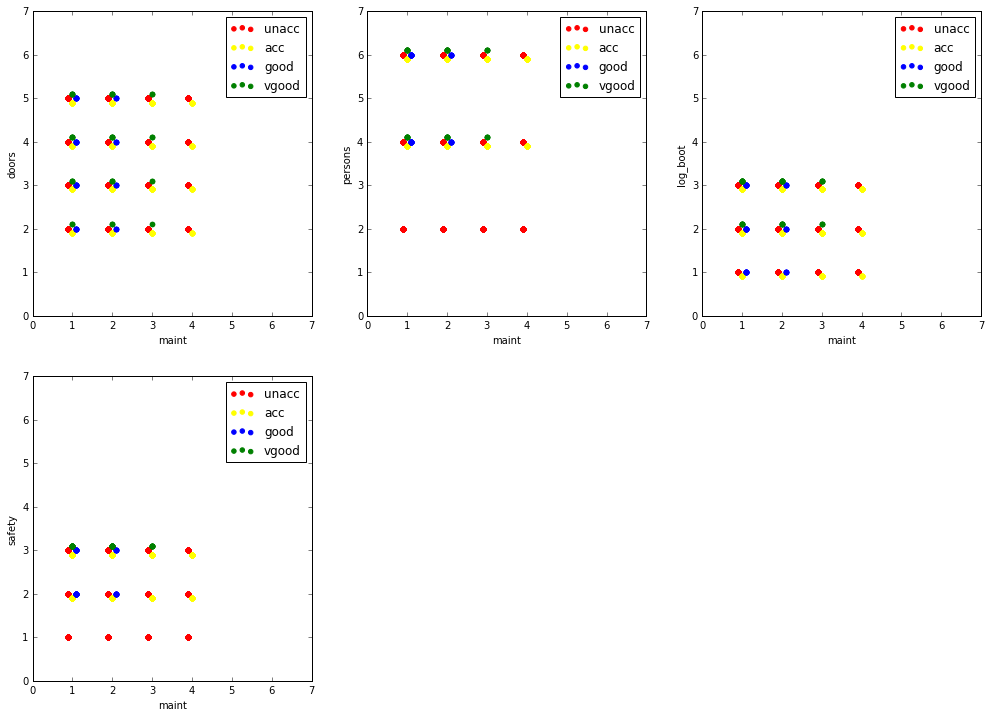

In [20]:
ax = []
fig = plt.figure(figsize=(17, 12))

xDataIdx = 1
yDataIdx = 2

for i in range(0,4):
    ax.append(fig.add_subplot(230 + (i+1)))

for i in range(0,4):
    x_data = feature_names[xDataIdx]
    y_data = feature_names[yDataIdx]
    ev1 = ax[i].scatter(df_unacc[x_data] - 0.1, df_unacc[y_data], color='red')
    ev2 = ax[i].scatter(df_acc[x_data], df_acc[y_data] - 0.1, color='yellow')
    ev3 = ax[i].scatter(df_good[x_data] + 0.1, df_good[y_data], color='blue')
    ev4 = ax[i].scatter(df_vgood[x_data], df_vgood[y_data] + 0.1, color='green')
    ax[i].set_xlabel(x_data)
    ax[i].set_ylabel(y_data)
    ax[i].set_xlim(0, 7)
    ax[i].set_ylim(0, 7)
    ax[i].legend((ev1, ev2, ev3, ev4), eval_names)
    yDataIdx = yDataIdx + 1

* 문의 개수와 상관 없이 유지보수 비용이 너무 높으면 만족도가 낮다.
* 유지보수 비용이 낮더라도 최대 탑승 인원이 2인 이하이면 만족도가 낮다.
* 유지보수 비용이 낮더라도 트렁크가 작으면 만족도가 조금 떨어진다.
* 안전성이 높더라도 유지보수 비용이 너무 높으면 만족도가 낮다.

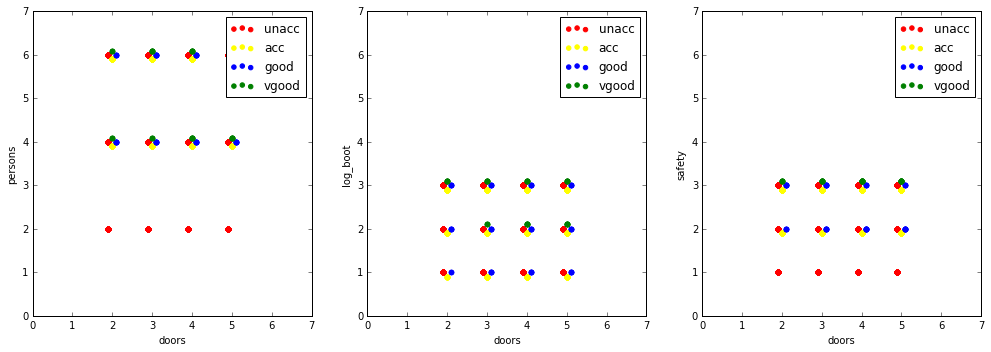

In [21]:
ax = []
fig = plt.figure(figsize=(17, 12))

xDataIdx = 2
yDataIdx = 3

for i in range(0,3):
    ax.append(fig.add_subplot(230 + (i+1)))

for i in range(0,3):
    x_data = feature_names[xDataIdx]
    y_data = feature_names[yDataIdx]
    ev1 = ax[i].scatter(df_unacc[x_data] - 0.1, df_unacc[y_data], color='red')
    ev2 = ax[i].scatter(df_acc[x_data], df_acc[y_data] - 0.1, color='yellow')
    ev3 = ax[i].scatter(df_good[x_data] + 0.1, df_good[y_data], color='blue')
    ev4 = ax[i].scatter(df_vgood[x_data], df_vgood[y_data] + 0.1, color='green')
    ax[i].set_xlabel(x_data)
    ax[i].set_ylabel(y_data)
    ax[i].set_xlim(0, 7)
    ax[i].set_ylim(0, 7)
    ax[i].legend((ev1, ev2, ev3, ev4), eval_names)
    yDataIdx = yDataIdx + 1

* 문의 개수와 상관 없이 탑승 인원 수가 2인 이하면 만족도가 낮다.
* 트렁크 크기가 중간정도 이상의 크기라도 문의 개수가 2개 이하이면 만족도가 낮아진다.
* 문이 개수와 상관 없이 안전도가 높아야 만족도가 높다.

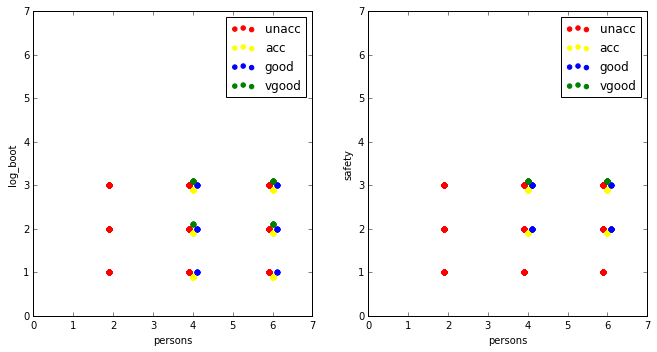

In [22]:
ax = []
fig = plt.figure(figsize=(17, 12))

xDataIdx = 3
yDataIdx = 4

for i in range(0,2):
    ax.append(fig.add_subplot(230 + (i+1)))

for i in range(0,2):
    x_data = feature_names[xDataIdx]
    y_data = feature_names[yDataIdx]
    ev1 = ax[i].scatter(df_unacc[x_data] - 0.1, df_unacc[y_data], color='red')
    ev2 = ax[i].scatter(df_acc[x_data], df_acc[y_data] - 0.1, color='yellow')
    ev3 = ax[i].scatter(df_good[x_data] + 0.1, df_good[y_data], color='blue')
    ev4 = ax[i].scatter(df_vgood[x_data], df_vgood[y_data] + 0.1, color='green')
    ax[i].set_xlabel(x_data)
    ax[i].set_ylabel(y_data)
    ax[i].set_xlim(0, 7)
    ax[i].set_ylim(0, 7)
    ax[i].legend((ev1, ev2, ev3, ev4), eval_names)
    yDataIdx = yDataIdx + 1

* 만족도를 높이려면 차량의 최대 탑승 인원이 4인 이상이고 트렁크의 크기가 중간 이상이어야 한다.
* 안전성이 높아도 최대 탑승 인원이 2인 이하이면 만족도가 낮다.

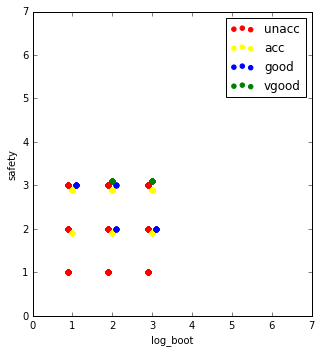

In [23]:
ax = []
fig = plt.figure(figsize=(17, 12))

xDataIdx = 4
yDataIdx = 5

for i in range(0,1):
    ax.append(fig.add_subplot(230 + (i+1)))

for i in range(0,1):
    x_data = feature_names[xDataIdx]
    y_data = feature_names[yDataIdx]
    ev1 = ax[i].scatter(df_unacc[x_data] - 0.1, df_unacc[y_data], color='red')
    ev2 = ax[i].scatter(df_acc[x_data], df_acc[y_data] - 0.1, color='yellow')
    ev3 = ax[i].scatter(df_good[x_data] + 0.1, df_good[y_data], color='blue')
    ev4 = ax[i].scatter(df_vgood[x_data], df_vgood[y_data] + 0.1, color='green')
    ax[i].set_xlabel(x_data)
    ax[i].set_ylabel(y_data)
    ax[i].set_xlim(0, 7)
    ax[i].set_ylim(0, 7)
    ax[i].legend((ev1, ev2, ev3, ev4), eval_names)
    yDataIdx = yDataIdx + 1

* 안전성이 높아도 트렁크의 크기가 작으면 만족도가 낮다.

### [Mission 4] 전체 데이터 집합에 대한 Entropy 산출
* Binary Target 이 아닌 4개의 Target 이 존재함을 유의해야 함

In [24]:
labels = df['eval'].values
print len(labels)
n_labels = len(labels)

1728


In [25]:
from collections import Counter
from math import log

print Counter(labels)
print Counter(labels).values()
counts = np.array(Counter(labels).values())
print counts
print

probs = counts / float(n_labels)
print probs
print

n_classes = np.count_nonzero(probs)
print n_classes
print

entropy = 0.

for i in probs:
    entropy -= i * log(i, n_classes)

print "Entropy of Root Node: %s" % entropy

Counter({1: 1210, 2: 384, 3: 69, 4: 65})
[1210, 384, 69, 65]
[1210  384   69   65]

[ 0.70023148  0.22222222  0.03993056  0.03761574]

4

Entropy of Root Node: 0.602870485006


In [26]:
def entropy(labels):
    """ Computes entropy of label distribution. """
    from collections import Counter
    from math import log
    n_labels = len(labels)

    if n_labels <= 1:
        return 0

    counts = np.array(Counter(labels).values())
    probs = counts / float(n_labels)
    n_classes = np.count_nonzero(probs)

    if n_classes <= 1:
        return 0

    entropy = 0.

    # Compute standard entropy.
    for i in probs:
        entropy -= i * log(i, n_classes)

    return entropy

In [27]:
df['eval'].values

array([1, 1, 1, ..., 1, 3, 4], dtype=int64)

In [28]:
entropy(df['eval'].values)

0.60287048500608764

* df_per_attr 사전 만들기

In [29]:
df.describe()

,buying,maint,doors,persons,log_boot,safety,eval
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,2.500000,2.500000,3.500000,4.000000,2.000000,2.000000,1.414931
std,1.118358,1.118358,1.118358,1.633466,0.816733,0.816733,0.740700
min,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000
25%,1.750000,1.750000,2.750000,2.000000,1.000000,1.000000,1.000000
50%,2.500000,2.500000,3.500000,4.000000,2.000000,2.000000,1.000000
75%,3.250000,3.250000,4.250000,6.000000,3.000000,3.000000,2.000000
max,4.000000,4.000000,5.000000,6.000000,3.000000,3.000000,4.000000


In [30]:
df_per_attr = {}
for i in range(0, 5):
    df_per_attr[i] = {}
    groupby_df = df[[i, 6]].groupby('eval')
    df_per_attr[i]['num_groups'] = groupby_df.ngroups
    df_per_attr[i]['group_keys'] = groupby_df.groups.keys()
    df_per_attr[i]['subgroups'] = {}
    for j in range(df_per_attr[i]['num_groups']):
        df_per_attr[i]['subgroups'][j] = groupby_df.get_group(df_per_attr[i]['group_keys'][j])

In [31]:
df_per_attr[1]['num_groups']

4

In [32]:
df_per_attr[1]['group_keys']

[1, 2, 3, 4]

In [33]:
df_per_attr[1]['subgroups'][0]

,maint,eval
0,4,1
1,4,1
2,4,1
3,4,1
4,4,1
5,4,1
6,4,1
7,4,1
8,4,1
9,4,1


In [34]:
df_per_attr[1]['subgroups'][3]

,maint,eval
1097,2,4
1106,2,4
1124,2,4
1130,2,4
1133,2,4
1148,2,4
1151,2,4
1157,2,4
1160,2,4
1175,2,4


In [35]:
df_per_attr[1]['subgroups'][0].values

array([[4, 1],
       [4, 1],
       [4, 1],
       ..., 
       [1, 1],
       [1, 1],
       [1, 1]], dtype=int64)

In [36]:
a = [item[0] for item in df_per_attr[1]['subgroups'][0].values]
print a

[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [37]:
entropy([item[0] for item in df_per_attr[1]['subgroups'][0].values])

0.99436184958675533

In [38]:
a = [item[0] for item in df_per_attr[1]['subgroups'][3].values]
print a

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [39]:
entropy([item[0] for item in df_per_attr[1]['subgroups'][3].values])

0.96022971786076106

### [Mission 5] Decision Tree 모델 구축을 고려하여 루트노드에서 첫번째 Branch를 위한 IG가 가장 높은 속성 산출
* 해당 속성을 잘 기억하고 Mission 6에서의 결과와 동일한지 확인해야 함

In [40]:
parent_size = float(len(df))
parent_size

1728.0

In [41]:
df_per_attr

{0: {'group_keys': [1, 2, 3, 4],
  'num_groups': 4,
  'subgroups': {0:       buying  eval
   0          4     1
   1          4     1
   2          4     1
   3          4     1
   4          4     1
   5          4     1
   6          4     1
   7          4     1
   8          4     1
   9          4     1
   10         4     1
   11         4     1
   12         4     1
   13         4     1
   14         4     1
   15         4     1
   16         4     1
   17         4     1
   18         4     1
   19         4     1
   20         4     1
   21         4     1
   22         4     1
   23         4     1
   24         4     1
   25         4     1
   26         4     1
   27         4     1
   28         4     1
   29         4     1
   ...      ...   ...
   1674       1     1
   1675       1     1
   1676       1     1
   1677       1     1
   1678       1     1
   1679       1     1
   1680       1     1
   1681       1     1
   1682       1     1
   1683       1     1
   1686 

In [42]:
for i in range(0, 5):
    for j in range(df_per_attr[i]['num_groups']):
        print i, j

0 0
0 1
0 2
0 3
1 0
1 1
1 2
1 3
2 0
2 1
2 2
2 3
3 0
3 1
3 2
3 3
4 0
4 1
4 2
4 3


In [43]:
for i in range(0, 5):
    sub_sum_entropy = 0.0
    print feature_names[i]
    for j in range(df_per_attr[i]['num_groups']):
        sub_size = len(df_per_attr[i]['subgroups'][j])
        sub_entropy = entropy([item[0] for item in df_per_attr[i]['subgroups'][j].values])
        print "%3.2f * %5.4f = %5.4f" % (sub_size / parent_size, sub_entropy, (sub_size / parent_size) * sub_entropy)
        sub_sum_entropy = sub_sum_entropy + (sub_size / parent_size) * sub_entropy
    ig = entropy(df['eval'].values) - sub_sum_entropy
    df_per_attr[i]['information_gain'] = ig
    print "Information Gain: %5.4f - %5.4f = %5.4f" % (entropy(df['eval'].values), sub_sum_entropy, ig)
    print

buying
0.70 * 0.9932 = 0.6955
0.22 * 0.9887 = 0.2197
0.04 * 0.9183 = 0.0367
0.04 * 0.9710 = 0.0365
Information Gain: 0.6029 - 0.9884 = -0.3855

maint
0.70 * 0.9944 = 0.6963
0.22 * 0.9896 = 0.2199
0.04 * 0.9183 = 0.0367
0.04 * 0.9602 = 0.0361
Information Gain: 0.6029 - 0.9890 = -0.3861

doors
0.70 * 0.9992 = 0.6997
0.22 * 0.9969 = 0.2215
0.04 * 0.9979 = 0.0398
0.04 * 0.9750 = 0.0367
Information Gain: 0.6029 - 0.9978 = -0.3949

persons
0.70 * 0.9604 = 0.6725
0.22 * 0.9993 = 0.2221
0.04 * 0.9986 = 0.0399
0.04 * 0.9957 = 0.0375
Information Gain: 0.6029 - 0.9719 = -0.3690

log_boot
0.70 * 0.9967 = 0.6979
0.22 * 0.9921 = 0.2205
0.04 * 0.9983 = 0.0399
0.04 * 0.9612 = 0.0362
Information Gain: 0.6029 - 0.9944 = -0.3915



In [44]:
import operator
information_gain_dict = {}
for i in range(0, 5):
    information_gain_dict[i] = df_per_attr[i]['information_gain']

information_gain_dict

{0: -0.38550057473471699,
 1: -0.38610709873918225,
 2: -0.39488665668059619,
 3: -0.36903605491906966,
 4: -0.39154119010675792}

### [Mission 6] sklearn 모듈을 활용하여 Decision Tree 모델을 구축하고 예측 시도
* 루트노드에서 첫번째 Branch를 구성할 때 활용한 속성이 Mission 5에서 산출한 것과 동일한지 파악
   * 해당 속성에 대하여 sklearn 모듈 내에서 어떠한 방법으로 기준을 정했는지 판단 및 해석
* 모델 구축 후 기존 Training Data중 일부에 대한 예측
* 기존 Training Data에 존재하지 않는 새로운 데이터에 대한 예측

In [45]:
from sklearn import tree
from sklearn.externals.six import StringIO

In [46]:
dfMat = df.as_matrix()
dfMat

array([[4, 4, 2, ..., 1, 1, 1],
       [4, 4, 2, ..., 1, 2, 1],
       [4, 4, 2, ..., 1, 3, 1],
       ..., 
       [1, 1, 5, ..., 3, 1, 1],
       [1, 1, 5, ..., 3, 2, 3],
       [1, 1, 5, ..., 3, 3, 4]], dtype=int64)

In [47]:
dfMatData = dfMat[:, 0:6]
dfMatData

array([[4, 4, 2, 2, 1, 1],
       [4, 4, 2, 2, 1, 2],
       [4, 4, 2, 2, 1, 3],
       ..., 
       [1, 1, 5, 6, 3, 1],
       [1, 1, 5, 6, 3, 2],
       [1, 1, 5, 6, 3, 3]], dtype=int64)

In [48]:
dfMatTarget = dfMat[:, 6:7]
dfMatTarget

array([[1],
       [1],
       [1],
       ..., 
       [1],
       [3],
       [4]], dtype=int64)

In [49]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(dfMatData, dfMatTarget)

In [50]:
with open("car.dot", 'w') as f:
    tree.export_graphviz(clf, out_file=f)

* car.png
![car](./car.png)